# Project 1 Part 5 - Machine Learning

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 5, your task is to use Linear Regression or KNN (or both!) to create a model to predict sales:

 * Data should not have any missing data
 * Handle categorical variables appropriately
 * Build a model to predict the "Item_Outlet_Sales" column
 * Evaluate the models
 * What improvements can be made to the model?
 * Which features are most associated with higher predicted sales?

## Import Statements

In [1]:
# imports for data handling
import pandas as pd
import numpy as np

# imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# imports for splitting and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# imports for machine learning
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import LinearRegression

# import for machine learning metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

## Load Data

In [2]:
# get file
filename = r"D:\CodingDojo\food-sales-predictions-kb\sales_predictions_clean.csv"

sales = pd.read_csv(filename)
sales.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3828,FDY56,16.350,Regular,0.062359,Fruits and Vegetables,224.0062,OUT013,1987,High,Tier 3,Supermarket Type1,4288.4178
1611,FDC57,20.100,Regular,0.095588,Fruits and Vegetables,193.9820,OUT019,1985,Small,Tier 1,Grocery Store,579.2460
5374,FDY01,11.800,Regular,0.170548,Canned,113.8834,OUT049,1999,Medium,Tier 1,Supermarket Type1,1382.2008
5754,FDW13,8.500,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
5288,FDH04,6.115,Regular,0.011419,Frozen Foods,91.0488,OUT018,2009,Medium,Tier 3,Supermarket Type2,1629.8784
4829,FDK20,12.600,Regular,0.041727,Fruits and Vegetables,122.0072,OUT018,2009,Medium,Tier 3,Supermarket Type2,1470.0864
697,FDR20,20.000,Regular,0.028118,Fruits and Vegetables,46.7744,OUT035,2004,Small,Tier 2,Supermarket Type1,1222.4088
678,DRL37,15.500,Low Fat,0.053362,Soft Drinks,41.5770,OUT035,2004,Small,Tier 2,Supermarket Type1,735.7090
5125,FDT47,5.260,Regular,0.024547,Breads,95.7068,OUT049,1999,Medium,Tier 1,Supermarket Type1,1166.4816
6086,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


## Check dataframe for missing values

In [3]:
# 6109 rows
# no null values

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6109 non-null   object 
 1   Item_Weight                6109 non-null   float64
 2   Item_Fat_Content           6109 non-null   object 
 3   Item_Visibility            6109 non-null   float64
 4   Item_Type                  6109 non-null   object 
 5   Item_MRP                   6109 non-null   float64
 6   Outlet_Identifier          6109 non-null   object 
 7   Outlet_Establishment_Year  6109 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       6109 non-null   object 
 10  Outlet_Type                6109 non-null   object 
 11  Item_Outlet_Sales          6109 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 572.8+ KB


## Categorical Columns

### Nominal
 * Item_Identifier
 * Item_Fat_Content
 * Item_Type
 * Outlet_Identifier
 
### Ordinal
 * Outlet_Size
 * Outlet_Location_Type
 * Outlet_Type

## Feature Engineering on Category Columns
Use pandas `get_dummies` to one-hot encode the nominal data.  Use `LabelEncoder` for the ordinal data.  
  
__One-Hot Encode__
 * Item_Fat_Content
 * Item_Type
 
__Label Encode__
 * Outlet_Size
 * Outlet_Location_Type
 * Outlet_Type

### One-Hot Encoding  

 * Item_Fat_Content
 * Item_Type

In [4]:
sales_dummies = pd.get_dummies(data= sales, 
                               drop_first= True, 
                               prefix= ['Fat','Type'],
                               columns= ['Item_Fat_Content','Item_Type'])
sales_dummies.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Type_Fruits and Vegetables,Type_Hard Drinks,Type_Health and Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,NCD19,8.930,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,0,0,0,1,0,0,0,0,0,0
4,FDP36,10.395,0.000000,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding  
Create label hierarchy based on observed ordinality in data.

 * Outlet_Size
 * Outlet_Location_Type
 * Outlet_Type

#### Column: Outlet_Size

In [5]:
# view unique values within column
sales['Outlet_Size'].value_counts()

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [6]:
# create mappings for label encoder
size_map = {'High': 0, 'Small': 1, 'Medium': 2}

# create Outlet_Size_Label column on sales_dummies
sales_dummies['Outlet_Size_Label'] = sales_dummies['Outlet_Size'].map(size_map)

#### Column: Outlet_Location_Type

In [7]:
# view unique values within column
sales['Outlet_Location_Type'].value_counts()

Tier 3    2792
Tier 1    2387
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [8]:
# create mappings for label encoder
loc_map = {'Tier 2': 0, 'Tier 1': 1, 'Tier 3': 2}

# create Outlet_Location_Label column on sales_dummies
sales_dummies['Outlet_Location_Label'] = sales_dummies['Outlet_Location_Type'].map(loc_map)

#### Column: Outlet_Type

In [9]:
# view unique values within column
sales['Outlet_Type'].value_counts()

Supermarket Type1    3722
Supermarket Type3     932
Supermarket Type2     928
Grocery Store         527
Name: Outlet_Type, dtype: int64

In [10]:
# create mappings for label encoder
type_map = {'Grocery Store': 0, 
            'Supermarket Type2': 1, 
            'Supermarket Type3': 2, 
            'Supermarket Type1': 3}

# create Outlet_Type_Label column on sales_dummies
sales_dummies['Outlet_Type_Label'] = sales_dummies['Outlet_Type'].map(type_map)

In [11]:
sales_dummies

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods,Outlet_Size_Label,Outlet_Location_Label,Outlet_Type_Label
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,2,1,3
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,1,0,2,2,1
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,1,0,0,0,0,0,2,1,3
3,NCD19,8.930,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,1,0,0,0,0,0,0,0,2,3
4,FDP36,10.395,0.000000,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,...,0,0,0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,FDF53,20.750,0.083607,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360,...,0,0,0,0,0,0,0,1,1,3
6105,FDF22,6.865,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,...,0,0,0,0,1,0,0,0,2,3
6106,NCJ29,10.600,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,...,0,0,0,0,0,0,0,1,0,3
6107,FDN46,7.210,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,...,0,0,0,0,1,0,0,2,2,1


## Feature Matrix and Target Vector

In [12]:
sales_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Identifier             6109 non-null   object 
 1   Item_Weight                 6109 non-null   float64
 2   Item_Visibility             6109 non-null   float64
 3   Item_MRP                    6109 non-null   float64
 4   Outlet_Identifier           6109 non-null   object 
 5   Outlet_Establishment_Year   6109 non-null   int64  
 6   Outlet_Size                 6109 non-null   object 
 7   Outlet_Location_Type        6109 non-null   object 
 8   Outlet_Type                 6109 non-null   object 
 9   Item_Outlet_Sales           6109 non-null   float64
 10  Fat_Regular                 6109 non-null   uint8  
 11  Type_Breads                 6109 non-null   uint8  
 12  Type_Breakfast              6109 non-null   uint8  
 13  Type_Canned                 6109 

In [13]:
# save sales_dummies to csv
file_loc = r"D:\CodingDojo\food-sales-predictions-kb\sales_dummies.csv"
sales_dummies.to_csv(file_loc, index=False)

In [14]:
# feature matrix X set to features desired for model
# use column list above to choose column index values

X = sales_dummies.iloc[:,[3,10] + list(range(26,29))]

In [15]:
# verify shape as 2D
X.shape

(6109, 5)

In [16]:
# target vector y
y = sales_dummies.loc[:,'Item_Outlet_Sales'].values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [17]:
# verify shape of target vector as 1D
y.shape

(6109,)

### Training and Testing Datasets & Standardization

In [18]:
# split feature matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
# scale the datasets

# instantiate the StandardScaler
scaler = StandardScaler()

# scale the training data (0 mean and unit variance)
X_train = scaler.fit_transform(X_train)

# transform testing dataset with same fit
X_test = scaler.transform(X_test)

## Modeling  
Use the KNeighbors Regressor to predict Item_Outlet_Sales

In [20]:
# run KNeighborsRegressor with range of k from 1 to 100
# make dataframe of results
# code inspired from 
# https://datasciencewithsan.com/knn/

# list to catch model results
knnr_results = []

# for loop
for k in range(1,101,1):
    
    # instantiate regressor model
    knnr = KNR(n_neighbors = k, )
    
    # fit training data
    knnr.fit(X_train, y_train)
    
    # capture test scores
    test_score = knnr.score(X_test, y_test)
    
    # capture training scores
    train_score = knnr.score(X_train, y_train)
    
    # predicted sales
    y_pred = knnr.predict(X_test)
    
    # Mean of Absolute Error
    MAE = mae(y_test, y_pred)
    
    # Mean of Square of Errors
    MSE = mse(y_test, y_pred)
    
    # Root of Mean of Square Errors
    RMSE = MSE**0.5
    
    # capture results into list of tuples
    knnr_results.append((k, train_score, test_score, MAE, MSE, RMSE))

# create dataframe of results
knnr_results = pd.DataFrame(knnr_results, columns=['K','Train Score','Test Score','MAE','MSE','RMSE'])

In [41]:
knnr_results.sort_values(by='MAE').head(25)

,K,Train Score,Test Score,MAE,MSE,RMSE
34,35,0.610321,0.568877,787.213666,1.228253e+06,1108.265864
35,36,0.610231,0.569131,787.248113,1.227529e+06,1107.939006
37,38,0.609786,0.568134,787.509834,1.230369e+06,1109.220145
36,37,0.610255,0.568964,787.624363,1.228005e+06,1108.153839
32,33,0.611318,0.567536,787.744953,1.232072e+06,1109.987390
38,39,0.610036,0.567367,788.308695,1.232555e+06,1110.204745
33,34,0.610907,0.566931,788.662423,1.233796e+06,1110.763532
39,40,0.609115,0.567453,788.697854,1.232310e+06,1110.094591
42,43,0.609401,0.568725,788.735625,1.228685e+06,1108.460858
31,32,0.611617,0.566864,788.833792,1.233989e+06,1110.850372


In [22]:
predictions = knnr.predict(X_test)
predictions[0:5]

array([3284.511244, 3678.964454, 2372.11224 , 5912.90322 , 3081.82175 ])

In [23]:
y_test[0:5]

array([ 5592.72  ,  4229.1616,  3338.3212, 10993.6896,  5812.434 ])

# Model Evaluation

In [38]:
model_stats = knnr_results.loc[knnr_results['MAE'] == knnr_results['MAE'].min(),:]
k = int(model_stats['K'].values)
err = int(model_stats['MAE'].values)

In [39]:
print(f'The best model performance was with K value of {k}. The Mean Absolute Error is ${err}')

The best model performance was with K value of 35. The Mean Absolute Error is $787


### What can improve the model?

 * The feature matrix initially contained the one-hot matrix encoded Item_Type column.  Removing these features improved the model performance

### Which features are most associated with higher predicted sales?

Based on the features matrix currently in use, the features most associated with higher predicted sales are
 * Item_MRP
 * Item_Fat_Content
 * Outlet_Size_Label
 * Outlet_Location_Label
 * Outlet_Type_Label

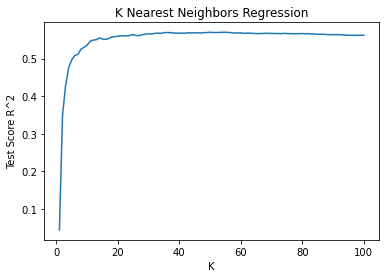

In [42]:
# plot test score R^2 vs K
plt.plot(knnr_results['K'], knnr_results['Test Score'])
plt.xlabel('K')
plt.ylabel('Test Score R^2')
plt.title('K Nearest Neighbors Regression');

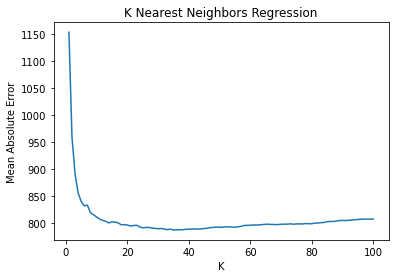

In [37]:
# plot mae vs K
plt.plot(knnr_results['K'], knnr_results['MAE'])
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.title('K Nearest Neighbors Regression');